In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [6]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [24]:
def adder(state: AgentState) -> AgentState:
    """These agents add two numbers together."""

    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState)->AgentState:
    """These agents subtract two numbers."""

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state['operation'] == '+':
        return "addition_opeartion" #we will return the edge here
    elif state["operation"] == '-':
        return "subtraction_operation"
        

In [17]:
graph = StateGraph(AgentState)

graph.add_node('add_node', adder)
graph.add_node('subtract_node', subtractor)
graph.add_node('router', lambda state: state) #passthrough function

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge : node
        "addition_opeartion": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge('add_node', END)
graph.add_edge('subtract_node', END)

app = graph.compile()


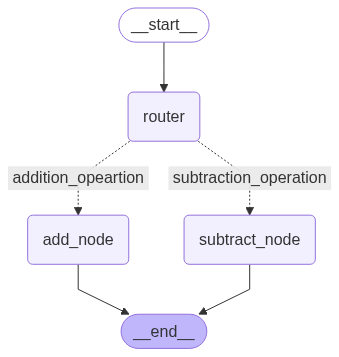

In [18]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))  

In [19]:
initial_state = AgentState(number1=10, operation='-', number2=5)

In [21]:
result = app.invoke(initial_state)
print(result)

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


### Exercise for Graph 4

In [22]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [23]:
class StateAgent(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int
    number3:int
    operation2: str
    number4: int
    finalNumber2: int

In [28]:
def node_one(state:StateAgent) -> StateAgent:
    """This agent will add two numbers together."""
    state[finalNumber] = state['number1'] + state['number2']
    return state

def node_two(state:StateAgent) -> StateAgent:
    """This agent will subtract two numbers."""
    state['finalNumber']= state['number1']- state['number2']
    return state

def decide_next_node1(state: StateAgent) -> StateAgent:
    """This node will select the next node of the graph"""
    if state['operation'] == '+':
        return "addition_opeartion" #we will return the edge here
    elif state["operation"] == '-':
        return "subtraction_operation"

def node_three(state:StateAgent) -> StateAgent:
    """This agent will add two numbers together."""
    state['finalNumber2'] = state['number3']+state['number4']
    return state

def node_four(state:StateAgent) -> StateAgent:
    """This agent will subtract two numbers."""
    state['finalNumber2'] = state['number3'] - state['numeber4']
    return state

def decide_next_node2(state: StateAgent) -> StateAgent:
    """This node will select the next node of the graph"""
    if state['operation2'] == '+':
        return "addition_opeartion2" #we will return the edge here
    elif state["operation2"] == '-':
        return "subtraction_operation2"

In [30]:

graph = StateGraph(StateAgent)

graph.add_node('node_one', node_one)
graph.add_node('node_two', node_two)
graph.add_node('router1', lambda state: state)

graph.add_conditional_edges(
    'router1',
    decide_next_node1,
    {
        "addition_opeartion": "node_one",
        "subtraction_operation": "node_two"
        }
)

graph.add_edge(START, 'router1')

graph.add_node('node_three', node_three)
graph.add_node('node_four', node_four)
graph.add_node('router2', lambda state: state)

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
        "addition_opeartion2": "node_three",
        "subtraction_operation2": "node_four"
    }
)

graph.add_edge('node_one', 'router2')
graph.add_edge('node_two', 'router2')

graph.add_edge('node_three', END)
graph.add_edge('node_four', END)

app = graph.compile()



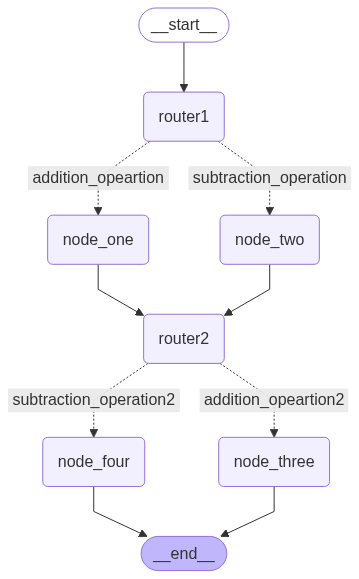

In [32]:
# Display the graph for the new app
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
result = app.invoke({
    'number1': 10,
    'operation': '-',
    'number2': 5,
    'number3': 20,
    'operation2': '+',
    'number4': 15
})
print(result)


{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 20, 'operation2': '+', 'number4': 15, 'finalNumber2': 35}
